Dataset used from https://www.kaggle.com/datasets/sivarazadi/wikiart-art-movementsstyles/data

**creator**: anisya safira

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, LSTM, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [61]:
import splitfolders

splitfolders.ratio("d:/0.coolyeah/0.msib/painting art data/era",seed=1337, output="splitted_811", ratio=(0.8, 0.1, 0.1))

Copying files: 1808 files [00:37, 48.71 files/s]


In [2]:
import os

BASE_DIR1 = 'd:/0.coolyeah/0.msib/painting art data/era/splitted_811'
train_dir1 = os.path.join(BASE_DIR1, 'train')
val_dir1 = os.path.join(BASE_DIR1, 'val')
test_dir1 = os.path.join(BASE_DIR1, 'test')

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen1 = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 0.1,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator1 = train_datagen1.flow_from_directory(directory = train_dir1,
                                                    target_size = (224, 224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    batch_size = 16)

Found 1107 images belonging to 12 classes.


In [4]:
labels = {value: key for key, value in train_generator1.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : baroque
1 : contemporary
2 : impressionism
3 : medieval
4 : modern
5 : neoclassicism
6 : post impressionism
7 : primitivism
8 : realism
9 : renaissance
10 : rococo
11 : romanticism


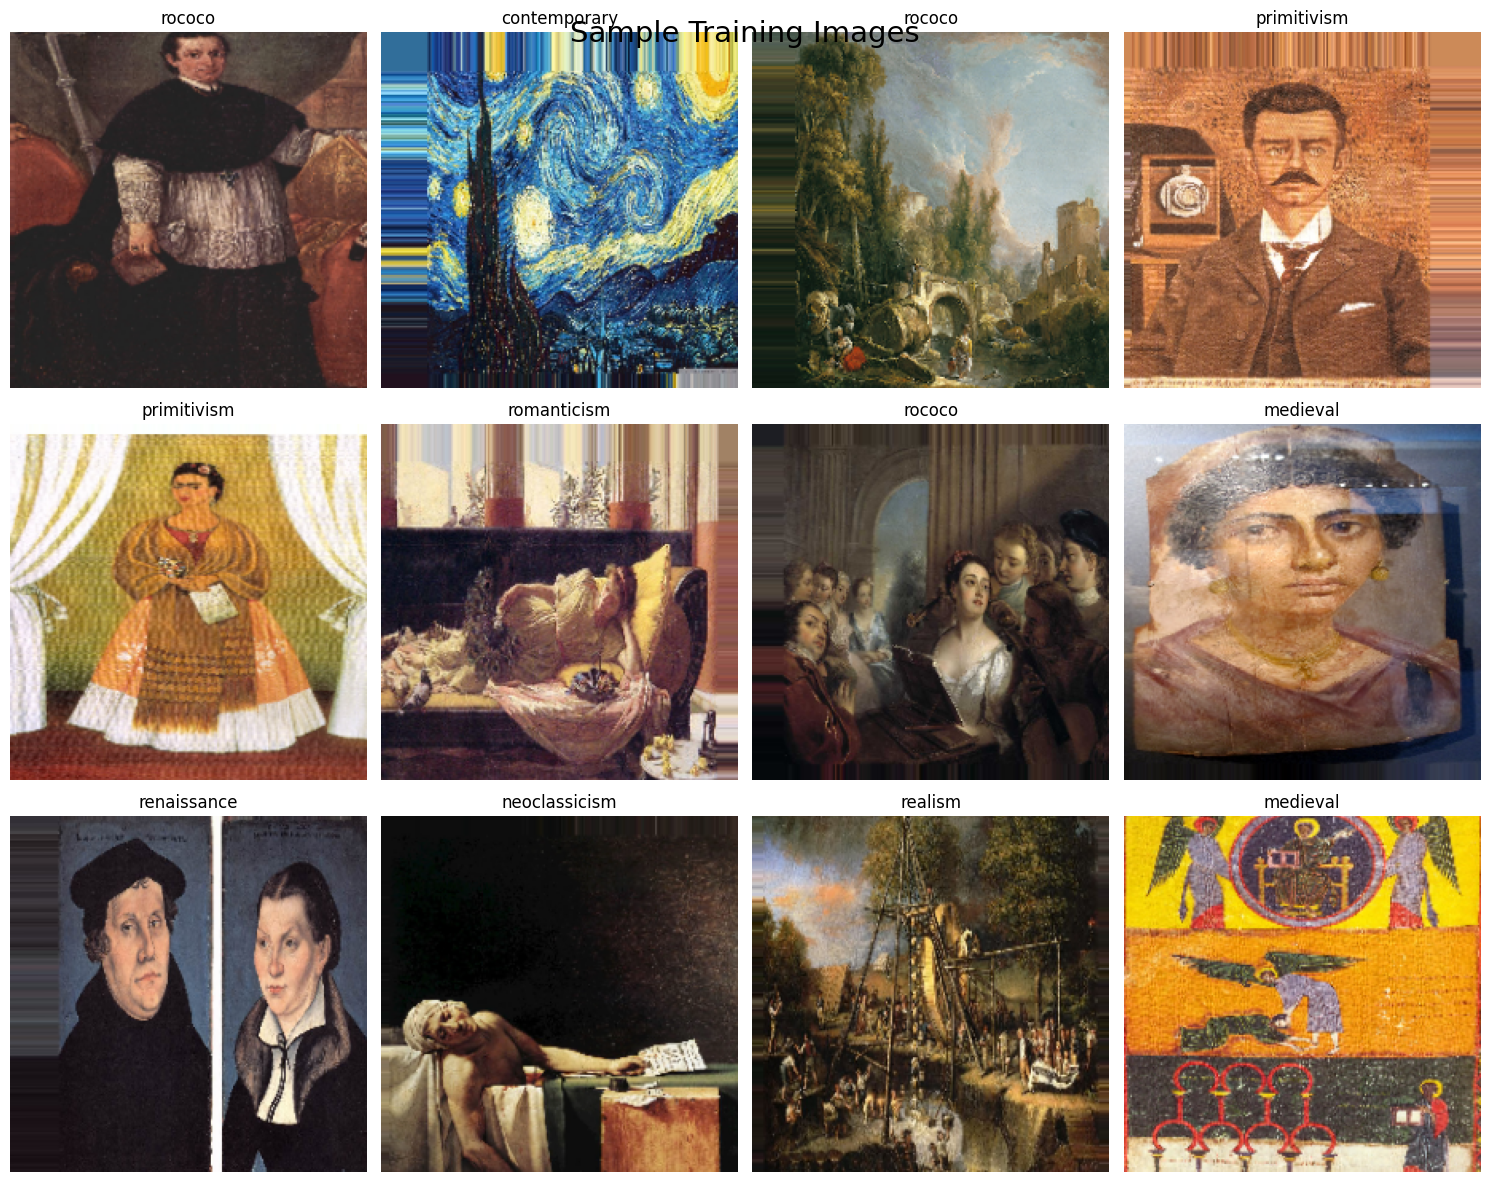

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_generator1[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator1[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [6]:
val_datagen1 = ImageDataGenerator(rescale=1. / 255)

val_generator1 = val_datagen1.flow_from_directory(directory=val_dir1,
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=True,
                                                batch_size=8,
                                                seed=123)

Found 134 images belonging to 12 classes.


In [7]:
test_datagen1 = ImageDataGenerator(rescale=1. / 255)

test_generator1 = val_datagen1.flow_from_directory(directory=test_dir1,
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=True,
                                                batch_size=8,
                                                seed=123)

Found 151 images belonging to 12 classes.


In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.83 and logs.get('val_accuracy') > 0.83):
            self.model.stop_training = True

In [123]:
model811 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape = (224, 224, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(axis=1),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(axis=1),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.25, noise_shape=None, seed=None),
        tf.keras.layers.Dense(12, activation='softmax')
    ])

callbacks = myCallback()

model811.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
model811.fit(train_generator1, epochs=5,
             validation_data=val_generator1,
             callbacks=[callbacks])

In [23]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001,decay_steps=10000,decay_rate=0.9,staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model811.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(
    restore_best_weights=True,
    patience = 3
)

In [127]:
model811.fit(train_generator1, epochs=5,
             validation_data=val_generator1,
             callbacks=[callbacks])

Epoch 1/5
70/70 [==============================] - 105s 1s/step - loss: 2.4430 - accuracy: 0.1256 - val_loss: 2.3675 - val_accuracy: 0.1567
Epoch 2/5
70/70 [==============================] - 105s 1s/step - loss: 2.3622 - accuracy: 0.1400 - val_loss: 2.3004 - val_accuracy: 0.1642
Epoch 3/5
70/70 [==============================] - 100s 1s/step - loss: 2.3495 - accuracy: 0.1481 - val_loss: 2.2997 - val_accuracy: 0.1493
Epoch 4/5
70/70 [==============================] - 98s 1s/step - loss: 2.3372 - accuracy: 0.1373 - val_loss: 2.3522 - val_accuracy: 0.1716
Epoch 5/5
70/70 [==============================] - 109s 2s/step - loss: 2.3381 - accuracy: 0.1554 - val_loss: 2.2133 - val_accuracy: 0.2015


In [128]:
model811.evaluate(test_generator1)

19/19 [==============================] - 5s 286ms/step - loss: 2.2568 - accuracy: 0.1921


[2.256812572479248, 0.19205297529697418]

In [130]:
model811.fit(train_generator1, epochs=10,
             validation_data=val_generator1,
             callbacks=es)

Epoch 1/10
32/70 [============>.................] - ETA: 55s - loss: 2.3093 - accuracy: 0.1758

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/70 [=================>............] - ETA: 40s - loss: 2.3003 - accuracy: 0.1831

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


70/70 [==============================] - 105s 1s/step - loss: 2.2851 - accuracy: 0.1789 - val_loss: 2.2877 - val_accuracy: 0.1343
Epoch 2/10
70/70 [==============================] - 95s 1s/step - loss: 2.2595 - accuracy: 0.1698 - val_loss: 2.2970 - val_accuracy: 0.1493
Epoch 3/10
70/70 [==============================] - 95s 1s/step - loss: 2.2578 - accuracy: 0.1816 - val_loss: 2.1400 - val_accuracy: 0.1940
Epoch 4/10
70/70 [==============================] - 110s 2s/step - loss: 2.2188 - accuracy: 0.1798 - val_loss: 2.1411 - val_accuracy: 0.2164
Epoch 5/10
70/70 [==============================] - 107s 2s/step - loss: 2.1973 - accuracy: 0.1960 - val_loss: 2.0848 - val_accuracy: 0.2313
Epoch 6/10
70/70 [==============================] - 103s 1s/step - loss: 2.1854 - accuracy: 0.2042 - val_loss: 2.2026 - val_accuracy: 0.1866
Epoch 7/10
70/70 [==============================] - 106s 2s/step - loss: 2.1935 - accuracy: 0.1951 - val_loss: 2.0723 - val_accuracy: 0.2537
Epoch 8/10
70/70 [========

In [131]:
model811.evaluate(test_generator1)

19/19 [==============================] - 7s 335ms/step - loss: 2.0581 - accuracy: 0.2185


[2.0580523014068604, 0.21854305267333984]

In [135]:
model811.fit(train_generator1, epochs=10,
                   validation_data=val_generator1,
                   callbacks=es)

Epoch 1/10
70/70 [==============================] - 108s 2s/step - loss: 2.1897 - accuracy: 0.2177 - val_loss: 2.1449 - val_accuracy: 0.2164
Epoch 2/10
70/70 [==============================] - 103s 1s/step - loss: 2.1739 - accuracy: 0.2060 - val_loss: 2.0427 - val_accuracy: 0.2388
Epoch 3/10
70/70 [==============================] - 106s 2s/step - loss: 2.1469 - accuracy: 0.2005 - val_loss: 2.1511 - val_accuracy: 0.2313
Epoch 4/10
70/70 [==============================] - 97s 1s/step - loss: 2.1485 - accuracy: 0.1978 - val_loss: 2.0788 - val_accuracy: 0.2463
Epoch 5/10
70/70 [==============================] - 105s 1s/step - loss: 2.1405 - accuracy: 0.2150 - val_loss: 2.0424 - val_accuracy: 0.2388
Epoch 6/10
70/70 [==============================] - 103s 1s/step - loss: 2.1148 - accuracy: 0.2168 - val_loss: 2.0298 - val_accuracy: 0.3060
Epoch 7/10
70/70 [==============================] - 97s 1s/step - loss: 2.0682 - accuracy: 0.2358 - val_loss: 2.0382 - val_accuracy: 0.2537
Epoch 8/10
70/7

In [136]:
model811.evaluate(test_generator1)

19/19 [==============================] - 5s 261ms/step - loss: 2.0808 - accuracy: 0.2781


[2.0808019638061523, 0.2781457006931305]

In [137]:
model811.fit(train_generator1, epochs=10,
                   validation_data=val_generator1,
                   callbacks=es)

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
40/70 [================>.............] - ETA: 46s - loss: 2.1001 - accuracy: 0.2169

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


41/70 [================>.............] - ETA: 44s - loss: 2.1023 - accuracy: 0.2162

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


70/70 [==============================] - 113s 2s/step - loss: 2.1011 - accuracy: 0.2249 - val_loss: 2.0753 - val_accuracy: 0.2537
Epoch 2/10
70/70 [==============================] - 108s 2s/step - loss: 2.0828 - accuracy: 0.2186 - val_loss: 1.9903 - val_accuracy: 0.2985
Epoch 3/10
70/70 [==============================] - 107s 2s/step - loss: 2.0935 - accuracy: 0.2276 - val_loss: 2.0516 - val_accuracy: 0.2836
Epoch 4/10
70/70 [==============================] - 108s 2s/step - loss: 2.0995 - accuracy: 0.2222 - val_loss: 1.9838 - val_accuracy: 0.2761
Epoch 5/10
70/70 [==============================] - 114s 2s/step - loss: 2.0853 - accuracy: 0.2168 - val_loss: 2.0158 - val_accuracy: 0.2836
Epoch 6/10
70/70 [==============================] - 115s 2s/step - loss: 2.0767 - accuracy: 0.2195 - val_loss: 1.9815 - val_accuracy: 0.2985
Epoch 7/10
70/70 [==============================] - 112s 2s/step - loss: 2.0525 - accuracy: 0.2159 - val_loss: 1.9992 - val_accuracy: 0.2910
Epoch 8/10
70/70 [======

In [139]:
model811.evaluate(test_generator1)

19/19 [==============================] - 7s 368ms/step - loss: 1.9857 - accuracy: 0.3377


[1.9857335090637207, 0.33774834871292114]

In [140]:
model811.fit(train_generator1, epochs=300,
             validation_data=val_generator1,
             callbacks=es)

Epoch 1/300
44/70 [=================>............] - ETA: 39s - loss: 2.0409 - accuracy: 0.2171

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


61/70 [=========================>....] - ETA: 13s - loss: 2.0424 - accuracy: 0.2253

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


70/70 [==============================] - 107s 2s/step - loss: 2.0295 - accuracy: 0.2313 - val_loss: 1.9515 - val_accuracy: 0.2910
Epoch 2/300
70/70 [==============================] - 100s 1s/step - loss: 2.0518 - accuracy: 0.2430 - val_loss: 1.9620 - val_accuracy: 0.2836
Epoch 3/300
70/70 [==============================] - 94s 1s/step - loss: 2.0365 - accuracy: 0.2385 - val_loss: 1.9977 - val_accuracy: 0.2612
Epoch 4/300
70/70 [==============================] - 96s 1s/step - loss: 2.0249 - accuracy: 0.2349 - val_loss: 2.0427 - val_accuracy: 0.3209


In [25]:
model811.fit(train_generator1, epochs=100,
             validation_data=val_generator1,
             callbacks=es)

Epoch 1/100
38/70 [===============>..............] - ETA: 46s - loss: 2.0369 - accuracy: 0.2303

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


51/70 [====================>.........] - ETA: 28s - loss: 2.0584 - accuracy: 0.2255

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


70/70 [==============================] - 116s 2s/step - loss: 2.0536 - accuracy: 0.2276 - val_loss: 2.0080 - val_accuracy: 0.2910
Epoch 2/100
70/70 [==============================] - 114s 2s/step - loss: 2.0559 - accuracy: 0.2439 - val_loss: 1.9865 - val_accuracy: 0.2910
Epoch 3/100
70/70 [==============================] - 101s 1s/step - loss: 2.0411 - accuracy: 0.2421 - val_loss: 1.9664 - val_accuracy: 0.2985
Epoch 4/100
70/70 [==============================] - 110s 2s/step - loss: 2.0298 - accuracy: 0.2502 - val_loss: 1.9729 - val_accuracy: 0.2985
Epoch 5/100
70/70 [==============================] - 112s 2s/step - loss: 2.0237 - accuracy: 0.2475 - val_loss: 2.0148 - val_accuracy: 0.2910
Epoch 6/100
70/70 [==============================] - 112s 2s/step - loss: 2.0406 - accuracy: 0.2466 - val_loss: 1.9866 - val_accuracy: 0.2910


In [26]:
print(model811.predict(img))

1/1 [==============================] - 0s 219ms/step
[[1.5164764e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [142]:
model811.fit(train_generator1, epochs=300,
             validation_data=val_generator1,
             callbacks=[callbacks])

Epoch 1/300
27/70 [==========>...................] - ETA: 52s - loss: 2.0342 - accuracy: 0.2500

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/70 [================>.............] - ETA: 36s - loss: 2.0519 - accuracy: 0.2217

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


70/70 [==============================] - 93s 1s/step - loss: 2.0761 - accuracy: 0.2141 - val_loss: 1.9789 - val_accuracy: 0.2537
Epoch 2/300
70/70 [==============================] - 95s 1s/step - loss: 2.0439 - accuracy: 0.2367 - val_loss: 1.9943 - val_accuracy: 0.2388
Epoch 3/300
70/70 [==============================] - 95s 1s/step - loss: 2.0276 - accuracy: 0.2511 - val_loss: 1.9906 - val_accuracy: 0.2687
Epoch 4/300
70/70 [==============================] - 98s 1s/step - loss: 2.0526 - accuracy: 0.2430 - val_loss: 1.9332 - val_accuracy: 0.2687
Epoch 5/300
70/70 [==============================] - 95s 1s/step - loss: 2.0282 - accuracy: 0.2430 - val_loss: 2.0039 - val_accuracy: 0.2985
Epoch 6/300
70/70 [==============================] - 96s 1s/step - loss: 2.0333 - accuracy: 0.2475 - val_loss: 1.9454 - val_accuracy: 0.3060
Epoch 7/300
70/70 [==============================] - 97s 1s/step - loss: 2.0303 - accuracy: 0.2665 - val_loss: 1.9362 - val_accuracy: 0.3134
Epoch 8/300
70/70 [======

In [145]:
model811.evaluate(val_generator1)

17/17 [==============================] - 3s 193ms/step - loss: 1.8217 - accuracy: 0.3955


[1.8216569423675537, 0.3955223858356476]

In [144]:
model811.save('era_model_224.h5')

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [146]:
era = tf.keras.models.load_model('era_model_224.h5')

era.fit(train_generator1, epochs=10,
        validation_data=val_generator1,
        callbacks=es)

Epoch 1/10
33/70 [=============>................] - ETA: 52s - loss: 1.0925 - accuracy: 0.5928

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


38/70 [===============>..............] - ETA: 45s - loss: 1.1174 - accuracy: 0.5872

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


70/70 [==============================] - 99s 1s/step - loss: 1.1619 - accuracy: 0.5709 - val_loss: 1.7641 - val_accuracy: 0.4030
Epoch 2/10
70/70 [==============================] - 95s 1s/step - loss: 1.2282 - accuracy: 0.5691 - val_loss: 1.6987 - val_accuracy: 0.4552
Epoch 3/10
70/70 [==============================] - 100s 1s/step - loss: 1.1639 - accuracy: 0.5763 - val_loss: 1.8288 - val_accuracy: 0.4104
Epoch 4/10
70/70 [==============================] - 95s 1s/step - loss: 1.1677 - accuracy: 0.5836 - val_loss: 1.8613 - val_accuracy: 0.4254
Epoch 5/10
70/70 [==============================] - 93s 1s/step - loss: 1.1679 - accuracy: 0.5691 - val_loss: 1.9072 - val_accuracy: 0.4328


In [105]:
model811.fit(train_generator1, epochs=20,
             validation_data=val_generator1,
             callbacks=[callbacks])

Epoch 1/20
16/70 [=====>........................] - ETA: 51s - loss: 1.5537 - accuracy: 0.4297

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


51/70 [====================>.........] - ETA: 16s - loss: 1.5746 - accuracy: 0.4314

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


70/70 [==============================] - 64s 891ms/step - loss: 1.5900 - accuracy: 0.4453 - val_loss: 1.7355 - val_accuracy: 0.3881
Epoch 2/20
70/70 [==============================] - 68s 966ms/step - loss: 1.6099 - accuracy: 0.4435 - val_loss: 1.6905 - val_accuracy: 0.4179
Epoch 3/20
70/70 [==============================] - 68s 964ms/step - loss: 1.5768 - accuracy: 0.4399 - val_loss: 1.7815 - val_accuracy: 0.4552
Epoch 4/20
70/70 [==============================] - 64s 912ms/step - loss: 1.6220 - accuracy: 0.4264 - val_loss: 1.8621 - val_accuracy: 0.4104
Epoch 5/20
70/70 [==============================] - 77s 1s/step - loss: 1.5435 - accuracy: 0.4715 - val_loss: 1.7520 - val_accuracy: 0.3881
Epoch 6/20
70/70 [==============================] - 82s 1s/step - loss: 1.5627 - accuracy: 0.4372 - val_loss: 1.7890 - val_accuracy: 0.4403
Epoch 7/20
70/70 [==============================] - 78s 1s/step - loss: 1.5664 - accuracy: 0.4426 - val_loss: 1.8065 - val_accuracy: 0.4104
Epoch 8/20
70/70 [=

In [147]:
era.evaluate(test_generator1)

19/19 [==============================] - 5s 238ms/step - loss: 1.9545 - accuracy: 0.4702


[1.954516887664795, 0.4701986610889435]

In [148]:
era.save('era_model.h5')

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [157]:
model811.fit(train_generator1, epochs=50,
             validation_data=val_generator1,
             callbacks=[callbacks])

Epoch 1/50
65/70 [==========================>...] - ETA: 6s - loss: 1.2034 - accuracy: 0.5745

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


66/70 [===========================>..] - ETA: 5s - loss: 1.2005 - accuracy: 0.5772

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


70/70 [==============================] - 100s 1s/step - loss: 1.2039 - accuracy: 0.5763 - val_loss: 1.7049 - val_accuracy: 0.4328
Epoch 2/50
70/70 [==============================] - 98s 1s/step - loss: 1.1764 - accuracy: 0.5745 - val_loss: 2.1827 - val_accuracy: 0.4254
Epoch 3/50
70/70 [==============================] - 94s 1s/step - loss: 1.1853 - accuracy: 0.5736 - val_loss: 1.6937 - val_accuracy: 0.4254
Epoch 4/50
70/70 [==============================] - 87s 1s/step - loss: 1.1803 - accuracy: 0.5718 - val_loss: 1.7430 - val_accuracy: 0.4254
Epoch 5/50
70/70 [==============================] - 88s 1s/step - loss: 1.2094 - accuracy: 0.5700 - val_loss: 2.0308 - val_accuracy: 0.4179
Epoch 6/50
70/70 [==============================] - 88s 1s/step - loss: 1.3278 - accuracy: 0.5628 - val_loss: 1.8533 - val_accuracy: 0.4030
Epoch 7/50
70/70 [==============================] - 90s 1s/step - loss: 1.2114 - accuracy: 0.5664 - val_loss: 1.7860 - val_accuracy: 0.3955
Epoch 8/50
70/70 [============

In [158]:
model811.evaluate(test_generator1)

19/19 [==============================] - 8s 401ms/step - loss: 2.1233 - accuracy: 0.4901


[2.1232903003692627, 0.4900662302970886]

In [161]:
model811.save('era_model.h5')

C:\Users\anisy\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(era_model)
tflite_model = converter.convert()
open("era_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\anisy\AppData\Local\Temp\tmp10lotvtw\assets


INFO:tensorflow:Assets written to: C:\Users\anisy\AppData\Local\Temp\tmp10lotvtw\assets


2888408